## Homework 3: Data exploration and visualization

In this homework you will practice manipulating, exploring and visualizing data in order to answer questions about the data.

Before you begin, download this notebook, and the files "data/hw3_health_w.txt" and "data/hw3_health_m.txt" to your computer and copy them to your own repository. As we discussed in the last class, the easiest way to do that is if you clone the class repository in a separate folder on your computer with the command:

```git clone https://github.com/venpopov/DataSciencePsychUZH```

If you have already cloned previously the class repository, you can update it on your computer with the new files by "pulling" information from github via the following command, which you need to run while your terminal is in your "DataSciencePsychUZH" folder:

```git pull```



### Loading and manipulating data

The datasets `hw3_health_m.txt` and `hw3_health_w.txt` contain data for the average number of steps per day and the BMI index for a number of men and women, respectively.

First, load the two datasets via the `read.table()` command. You need to specify that the first row of the files contains the variable names, by setting the `header = TRUE` argument in the `read.table()` command **(1 point)**:

In [13]:
setwd("C:/Users/hanna/Desktop/FS21/data_science/HW3/Homeworks/data")
library(tidyverse)
data_w <- read.table("hw3_health_w.txt", header = TRUE)
data_m <- read.table("hw3_health_m.txt", header = TRUE)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.6     v dplyr   1.0.5
v tidyr   1.1.3     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



Use the `str()` and `head()` commands to become familiar with the structure of the datasets **(1 point)**

In [15]:
str(data_w)
str(data_m)

'data.frame':	921 obs. of  3 variables:
 $ ID   : int  3 4 5 9 12 14 15 16 21 23 ...
 $ steps: int  15000 14861 14861 14699 14560 14560 14560 14560 14560 14560 ...
 $ bmi  : num  17 17.2 17.2 16.8 20.4 20.5 20.5 20.5 19.7 19.6 ...
'data.frame':	865 obs. of  3 variables:
 $ ID   : int  1 2 6 7 8 10 11 13 17 18 ...
 $ steps: int  15000 15000 14861 14861 14699 14560 14560 14560 14560 14560 ...
 $ bmi  : num  16.9 16.9 16.8 16.8 17.3 20.5 20.6 20.5 20.4 20.4 ...


Based on the output from the `str()` command, how many men and women is there data for? **(1 point)**
- men: 865, women: 921

Based on what you learned in the previous homework, are these datasets tidy? Please explain your answer. If necessary, write code in the field below to tidy up the datasets **(2 points)**
- No, the dataset is not tidy because a single observation unit is stored in two datasets (women & men)-> they should be merged.

In [38]:
#First add a column to identify the sex
data_w <- add_column(data_w, sex="w", .before = "steps")
data_m <- add_column(data_m, sex="m", .before = "steps")

#Then merge the two datasets
data <- bind_rows(data_w, data_m)

### Exploring the BMI variable

Let's try to understand our data better. Use `ggplot()` to answer the following questions:

How is the BMI distributed overall, regardless of gender? (hint: use either `geom_density()`; **2 points**) 

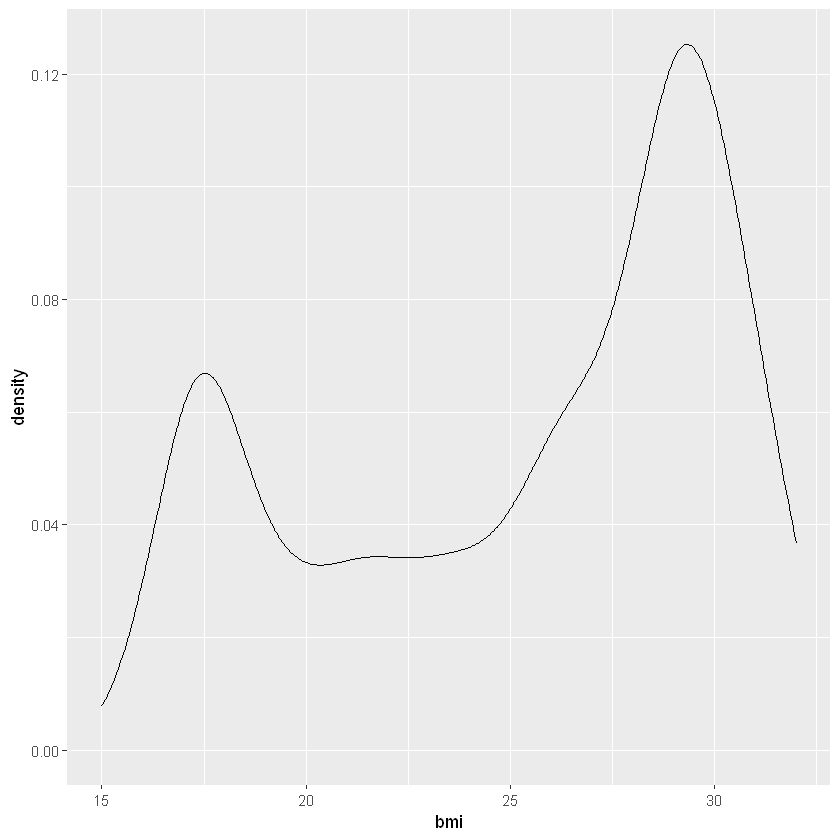

In [40]:
ggplot(data, aes(x=bmi)) + geom_density()

How would you describe the distribution you found in the previous command?
- the distribution is bimodal

Do men and women differ in their BMI? First, run a T test via the `t.test()` command to answer this question **(2 points)**

In [39]:
t.test(bmi~sex, data=data)


	Welch Two Sample t-test

data:  bmi by sex
t = -3.2353, df = 1768.3, p-value = 0.001238
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.2043522 -0.2952488
sample estimates:
mean in group m mean in group w 
       24.90775        25.65755 


- Yes, they do differ in their BMI, they have a different mean BMI and the p-value is below 0.05 and therefore significant. 

Can the results of your `t.test()` explain the shape of the distribution of BMI you found in the previous step? Add the `color=gender` argument in the `aes()` part of your previous `ggplot()` call to split the distribution by gender and answer this question **(3 points)**

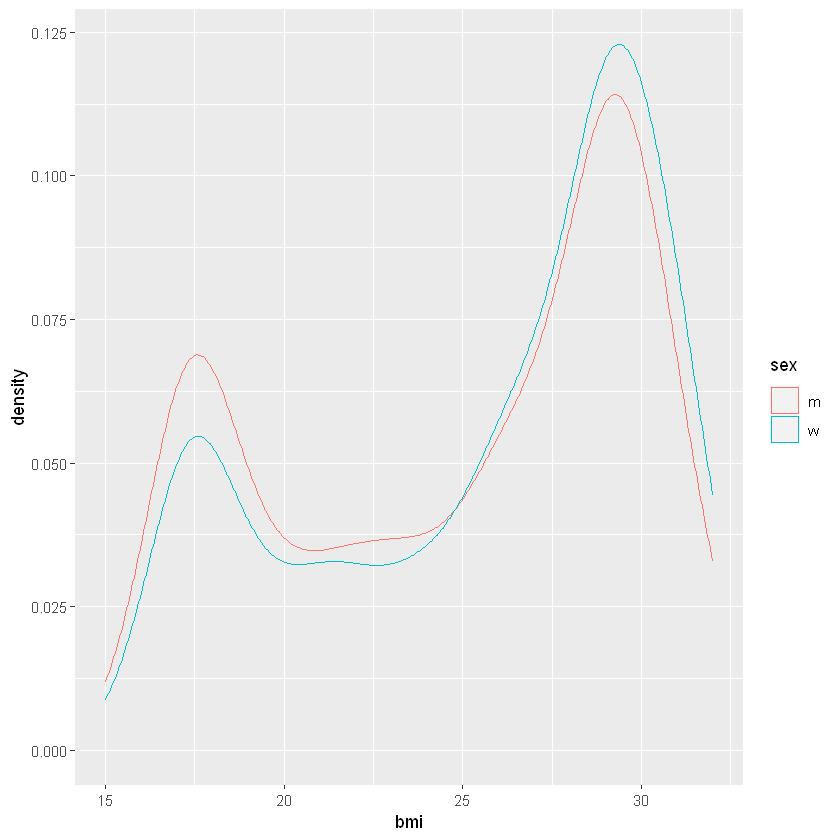

In [45]:
ggplot(data, aes(x=bmi, color=sex)) + geom_density()

- No, it doesn't. Both, the female and the male bmi have a bimodal distribution.

### Exploring the STEPS variable

Some errors were made when coding the steps variable. Plot a histogram of the `steps` variable. What is unusual about this data? **(2 points)**

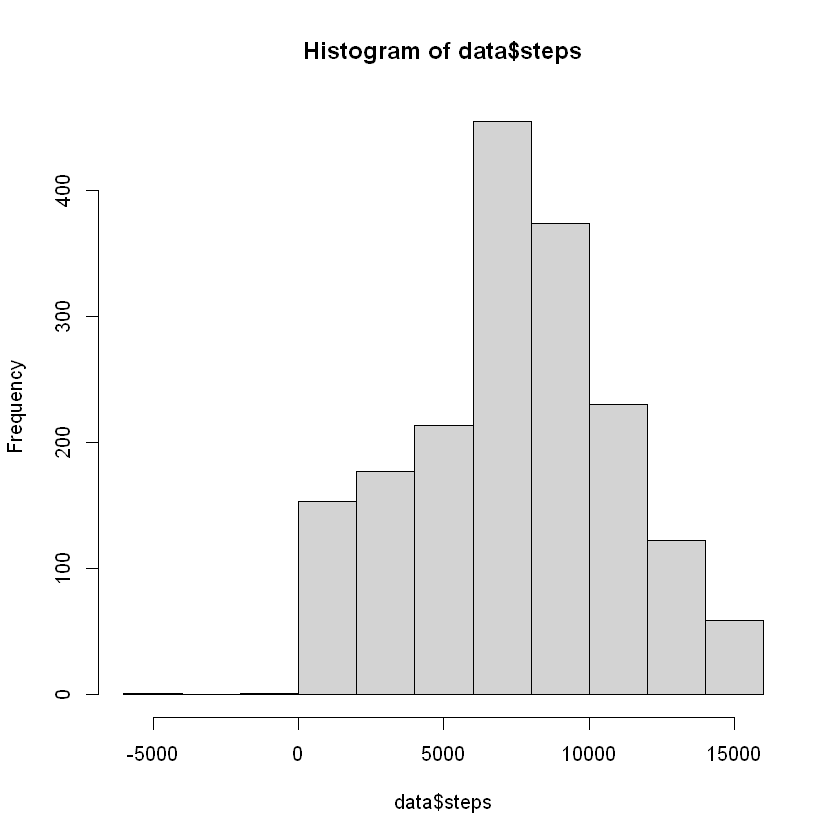

In [78]:
hist(data$steps)

- There is one observation with a negative amount of steps, which is not possible. There doesn't seem to be a normal distribution, it's right-steep.

One data point needs to be removed from this dataset. Use the `filter()` command on the `steps` variable to remove the incorrect data point, and save the result to a new data frame **(2 points)**

In [74]:
data_corr <- filter(data, steps>=0)

### The relationship between daily steps and BMI

Now that we understand how the individual variables are distributed, and that we have cleaned up the incorrectly coded data point, it's time to understand whether daily steps are related to BMI. 

Please use the `cor.test()` function to answer the following questions **(5 points)**
- *Is there a statistically significant correlation between daily steps and BMI*
- *Does the correlation between daily steps and BMI differ for men and women*

In [82]:
#question 1
cor.test(data_corr$bmi, data_corr$steps, alternative = c("two.sided"))

#question2
cor.test(~bmi + steps, data = filter(data_corr, sex=="w"))
cor.test(~bmi + steps, data = filter(data_corr, sex=="m"))


	Pearson's product-moment correlation

data:  data_corr$bmi and data_corr$steps
t = -12.402, df = 1783, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3239556 -0.2385171
sample estimates:
       cor 
-0.2817949 



	Pearson's product-moment correlation

data:  bmi and steps
t = -9.9747, df = 918, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.3698633 -0.2531890
sample estimates:
       cor 
-0.3127052 



	Pearson's product-moment correlation

data:  bmi and steps
t = -6.9541, df = 863, p-value = 7.006e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.2925195 -0.1662485
sample estimates:
       cor 
-0.2303534 


-1) There is a significant correlation between daily steps and BMI, since the p-value of the correlation test of bmi and steps is less than 0.05 and therefore significant.

2)The correlation between daily steps and BMI differs between men and women. Since it's not the same for women (-0.31) and men (-0.23).


Finally, in addition to running a statistical correlation test, what else can you do to better understand the relationship between daily steps and BMI? How would you described this relationship? **(3 points)** 

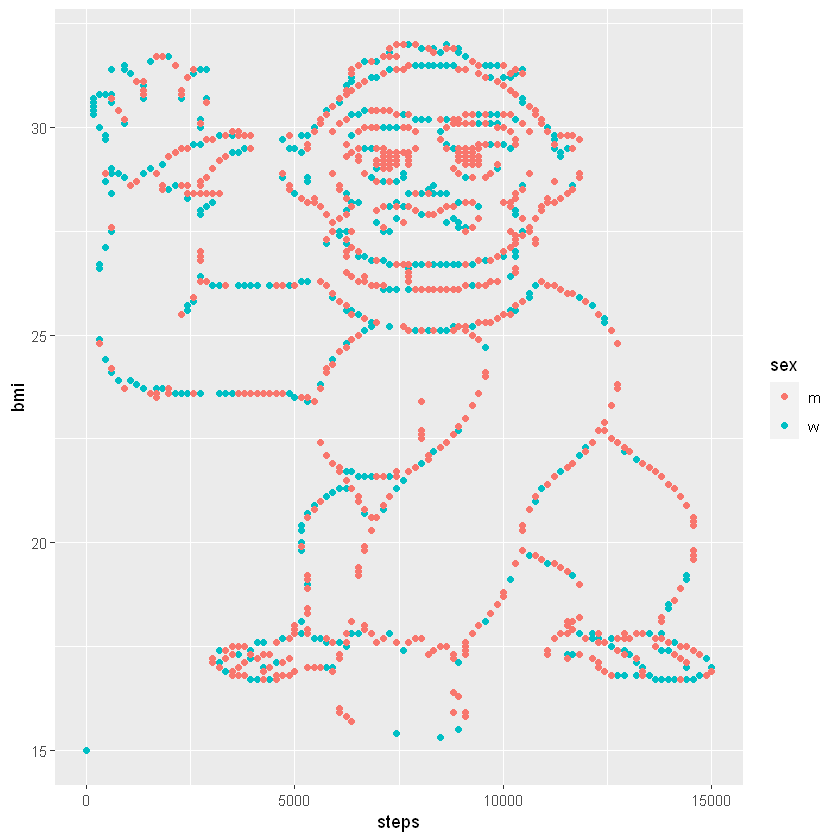

In [76]:
ggplot(data = data_corr) + 
  geom_point(mapping = aes(x = steps, y = bmi, color = sex))

 very ape-like :D, there doesn't seem to be a clear relationship